<a href="https://colab.research.google.com/github/SeptianLee/TI05_Septian_0110223149/blob/main/tugasDM_praktik2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("gdrive/My Drive/ColabDataMining/babies.csv")
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


id, birthweight in ounces, length of gestation in days, binary indicator for a first pregnancy (0 = first pregnancy), mother's age in years, mother's height in inches, mother's weight in pounds, binary indicator for whether the mother smokes.

In [8]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [7]:
df['height'].mode()

,height
0,64.0


In [10]:
# quartile 1
q1 = df['height'].quantile(0.25)
print("Q1 : ",q1)

# quartile 3
q3 = df['height'].quantile(0.75)
print("Q3 : ",q3)

iqr = q3 - q1
print("IQR : ",iqr)

Q1 :  62.0
Q3 :  66.0
IQR :  4.0


<Axes: >

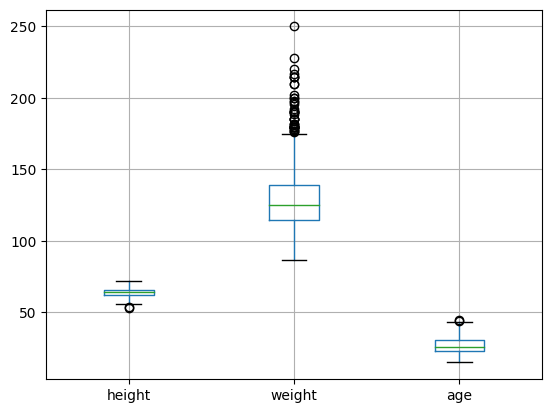

In [12]:
import matplotlib.pyplot as plt

df.boxplot(column=['height', 'weight', 'age'])


In [13]:
outlier_data = {
    'height': [60, 72],
    'weight': [120, 250],
    'age':  [18, 45]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1.0,120.0,284.0,0.0,27.0,62.0,100.0,0.0
1,2.0,113.0,282.0,0.0,33.0,64.0,135.0,0.0
2,3.0,128.0,279.0,0.0,28.0,64.0,115.0,1.0
3,4.0,123.0,NaN,0.0,36.0,69.0,190.0,0.0
4,5.0,108.0,282.0,0.0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1233,1234.0,130.0,291.0,0.0,30.0,65.0,150.0,1.0
1234,1235.0,125.0,281.0,1.0,21.0,65.0,110.0,0.0
1235,1236.0,117.0,297.0,0.0,38.0,65.0,129.0,0.0
1236,NaN,NaN,NaN,NaN,18.0,60.0,120.0,NaN


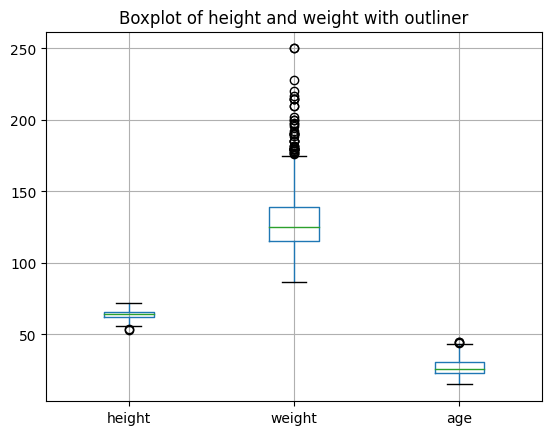

In [14]:
import matplotlib.pyplot as plt

#membuatboxplot untuk kolom height dan weight
df.boxplot(column=['height', 'weight', 'age'])
plt.title('Boxplot of height and weight with outliner')
plt.show()

In [15]:
# quartile 1
q1 = df['height'].quantile(0.25)
print("Q1 : ",q1)

# quartile 3
q3 = df['height'].quantile(0.75)
print("Q3 : ",q3)

iqr = q3 - q1
print("IQR : ",iqr)

#hitung batas bawah
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# temukan outlier dalam dataframe
outliner = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]

print("Outliner height: ")
print(outliner)

Q1 :  62.0
Q3 :  66.0
IQR :  4.0
Outliner height: 
        case    bwt  gestation  parity   age  height  weight  smoke
434    435.0  146.0      263.0     0.0  39.0    53.0   110.0    1.0
1208  1209.0  141.0      281.0     0.0  29.0    54.0   156.0    1.0


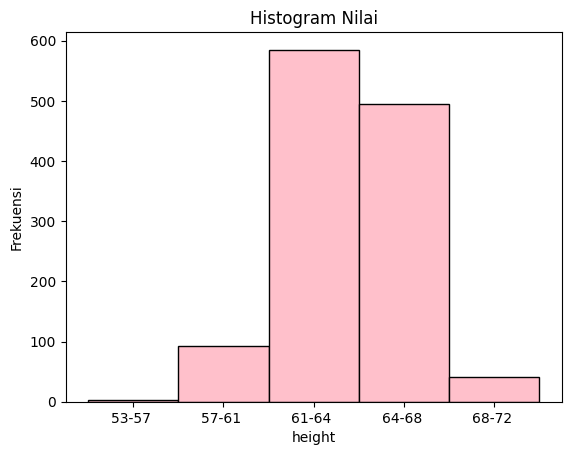

In [16]:
data_height = df["height"]
# Buat histogram
n, bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [17]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['height'] > upper_bound) | (df['height'] < lower_bound)) | (df['weight'] < 120) | (df['weight'] > 250) | (df['age'] < 18) | (df['age'] > 45)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

        case    bwt  gestation  parity   age  height  weight  smoke
1232  1233.0  128.0      265.0     0.0  24.0    67.0   120.0    0.0
1233  1234.0  130.0      291.0     0.0  30.0    65.0   150.0    1.0
1235  1236.0  117.0      297.0     0.0  38.0    65.0   129.0    0.0
1236     NaN    NaN        NaN     NaN  18.0    60.0   120.0    NaN
1237     NaN    NaN        NaN     NaN  45.0    72.0   250.0    NaN


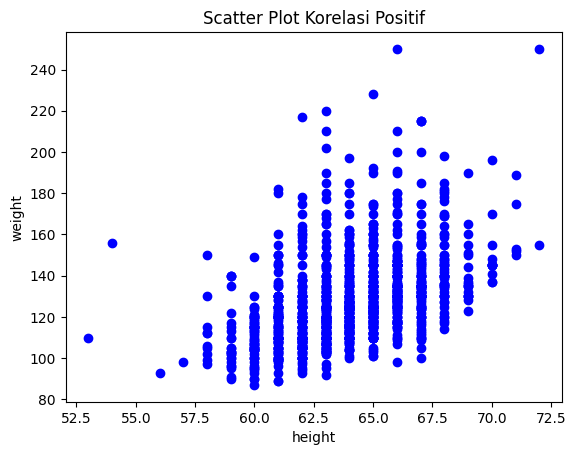

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Buat scatter plot
plt.scatter(df['height'], df['weight'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('height')
plt.ylabel('weight')

# Tampilkan plot

plt.show()

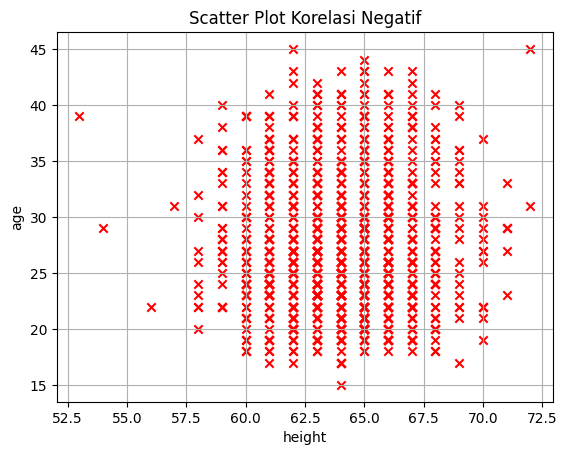

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Buat scatter plot
plt.scatter(df['height'], df['age'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('height')
plt.ylabel('age')

# Tampilkan plot
plt.grid(True)
plt.show()